## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1000, 500, 200, 100, 50], drp_ratio=0.3):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.35

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE) #, nesterov=True, momentum=MOMENTUM
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1000)              3073000   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1000)              0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 500)               500500    
_________________________________________________________________
dropout_12 (Dropout)         (None, 500)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 200)               100200    
_________________________________________________________________
dropout_13 (Dropout)         (None, 200)               0   

50000/50000 [==============================] - 27s 541us/step - loss: 1.7468 - accuracy: 0.3669 - val_loss: 1.6955 - val_accuracy: 0.4012
Epoch 43/50
50000/50000 [==============================] - 22s 439us/step - loss: 1.7433 - accuracy: 0.3692 - val_loss: 1.6619 - val_accuracy: 0.4160
Epoch 44/50
50000/50000 [==============================] - 25s 508us/step - loss: 1.7471 - accuracy: 0.3661 - val_loss: 1.6809 - val_accuracy: 0.4070
Epoch 45/50
50000/50000 [==============================] - 25s 498us/step - loss: 1.7480 - accuracy: 0.3668 - val_loss: 1.6707 - val_accuracy: 0.4115
Epoch 46/50
50000/50000 [==============================] - 24s 473us/step - loss: 1.7341 - accuracy: 0.3694 - val_loss: 1.6841 - val_accuracy: 0.4095
Epoch 47/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.7346 - accuracy: 0.3704 - val_loss: 1.6887 - val_accuracy: 0.4086
Epoch 48/50
50000/50000 [==============================] - 24s 490us/step - loss: 1.7323 - accuracy: 0.3732 - va

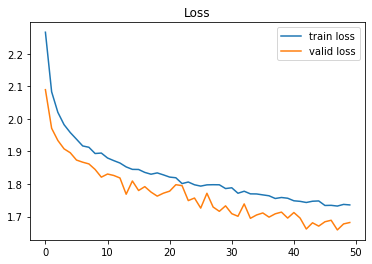

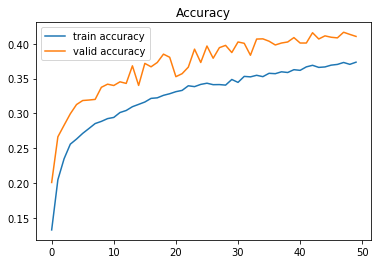

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()